In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

path = '../data/'
filename = "Melbourne_housing_FULL.csv"

data = pd.read_csv(path + filename)

#%% Using NaN data
## about 22% of the data contains missing values. How do we use them 
## nonetheless? This approach replaces their value with the mean of the
## column in which they are; better would be to also do it according to
## regions and other parameters of influence

# only keep prices that we know of
data = data.dropna(axis = 0, how = 'any', subset = ["Price"])



X = data["Bathroom"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(X)
X = imp.transform(X)
data["Bathroom"] = X

X = data["Car"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(X)
X = imp.transform(X)
data["Car"] = X

X = data["Bedroom2"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(X)
X = imp.transform(X)
data["Bedroom2"] = X

X = data["Propertycount"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(X)
X = imp.transform(X)
data["Propertycount"] = X

X = data["BuildingArea"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)
data["BuildingArea"] = X

X = data["Landsize"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)
data["Landsize"] = X

X = data["Lattitude"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)
data["Lattitude"] = X

X = data["Longtitude"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)
data["Longtitude"] = X

X = data["Distance"].values.reshape(-1, 1)
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)
data["Distance"] = X

data.head(10)



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.000000,156.834586,NaN,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.000000,79.000000,1900.0,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.000000,150.000000,1900.0,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.000000,156.834586,NaN,Yarra City Council,-37.796900,144.996900,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.000000,142.000000,2014.0,Yarra City Council,-37.807200,144.994100,Northern Metropolitan,4019.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.000000,156.834586,NaN,Yarra City Council,-37.804100,144.995300,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.000000,210.000000,1910.0,Yarra City Council,-37.802400,144.999300,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.000000,107.000000,1890.0,Yarra City Council,-37.806000,144.995400,Northern Metropolitan,4019.0
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,1.0,2.0,593.488933,156.834586,NaN,Yarra City Council,-37.806963,144.996711,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,1.0,2.0,593.488933,156.834586,NaN,Yarra City Council,-37.806963,144.996711,Northern Metropolitan,4019.0


In [9]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [12]:
#%% Using proper data types
## some features have incorrect data types, such as Bathroom, Bedroom2, Car
## 

data["Bathroom"] = data["Bathroom"].astype('int64')
data["Bedroom2"] = data["Bedroom2"].astype('int64')
data["Car"] = data["Car"].astype('int64')
data["Propertycount"] = data["Propertycount"].astype('int64')


#%% Feature selection
## some features are moslty NaN and would be difficult to use for
## prediction; CouncilArea, YearBuilt
## some others have many NaNs but should influence price - BuildingArea for ins.
## some have too many features to be meaningful and we can drop them
## like Suburb, PostCode and Address (encoded in Lattittude and Longtitude)
## dates span only over one year so we could not take them into account
## or choose to scale prices accordingly - we can try to do so by looking
## at global housing trends, for now we leave it out

## Note that we can leave SellerG out because of all the additional features it adds
## and still get reasonable results. 

new_features = ['Rooms', 'Type', 'Price', 'Method',
        'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea','Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']
       

data = data[new_features]


data = pd.get_dummies(data,columns = ["Type","Method","Regionname"],
               prefix = ["type","method","region_name"])


#%% Data transformations
## We change the data to reflect the fact price distributions seem to 
## be log-normal

data["LogPrice"] = np.log(data["Price"])

#%% Outliers
## We could remove outliers from the data, which would likely produce better performances
## especially in regions or building areas with little information. For the sake of using
## as much data as possible, we keep those for now


#%% Scale the data

float_keys = ["LogPrice","Distance",
"Landsize","BuildingArea","Lattitude","Longtitude"]

scaler = preprocessing.StandardScaler()
scaler.fit(data[float_keys])

unique_scaler = preprocessing.StandardScaler()
unique_scaler.fit(data["LogPrice"].values.reshape(-1,1))

data[float_keys] = scaler.transform(data[float_keys])

In [13]:
data.dtypes

Rooms                                       int64
Price                                     float64
Distance                                  float64
Bedroom2                                    int64
Bathroom                                    int64
Car                                         int64
Landsize                                  float64
BuildingArea                              float64
Lattitude                                 float64
Longtitude                                float64
Propertycount                               int64
type_h                                      uint8
type_t                                      uint8
type_u                                      uint8
method_PI                                   uint8
method_S                                    uint8
method_SA                                   uint8
method_SP                                   uint8
method_VB                                   uint8
region_name_Eastern Metropolitan            uint8


In [14]:
data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,method_VB,region_name_Eastern Metropolitan,region_name_Eastern Victoria,region_name_Northern Metropolitan,region_name_Northern Victoria,region_name_South-Eastern Metropolitan,region_name_Southern Metropolitan,region_name_Western Metropolitan,region_name_Western Victoria,LogPrice
1,2,1480000.0,-1.293648,2,1,1,-0.128263,-1.011745e-16,0.091559,0.015945,...,0,0,0,1,0,0,0,0,0,0.937812
2,2,1035000.0,-1.293648,2,1,0,-0.143333,-2.770725e-01,-0.011651,-0.031258,...,0,0,0,1,0,0,0,0,0,0.245997
4,3,1465000.0,-1.293648,3,2,0,-0.150541,-2.432949e-02,-0.029060,-0.021817,...,0,0,0,1,0,0,0,0,0,0.918107
5,3,850000.0,-1.293648,3,2,1,-0.163646,-1.011745e-16,0.125133,0.001784,...,0,0,0,1,0,0,0,0,0,-0.134922
6,4,1600000.0,-1.293648,3,1,2,-0.155128,-5.280758e-02,-0.002947,-0.024649,...,1,0,0,1,0,0,0,0,0,1.088619


Computing regularization path using the coordinate descent lasso...


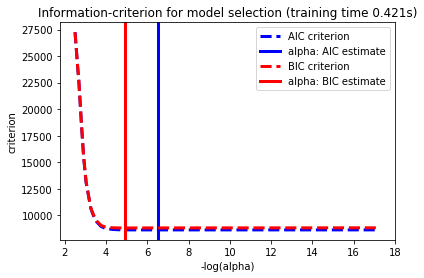

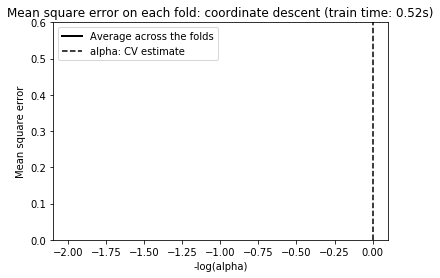

In [15]:
import pandas as pd
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

names = data.drop(["LogPrice","Price"],axis = 1).keys()
y = np.asarray(data["LogPrice"])
X = data.drop(["LogPrice","Price"],axis = 1)
X = np.asarray(X)

## Templates taken from scikit-learn website and modified for our purposes

#%% First model : Lasso


import time

from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.linear_model import LassoLarsIC, RidgeCV, Ridge

rng = np.random.RandomState(42)

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(alphas = np.logspace(0,2,num = 20),cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 0., 0.6
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

In [28]:
# RidgeCV: coordinate descent
# Display results

# Compute paths, only viable with Leave One Out validation
print("Computing regularization path using the ridge regression...")
t1 = time.time()
m_log_alphas = np.logspace(0,2,num = 20)

model = RidgeCV(cv=10,store_cv_values = True,alphas = m_log_alphas).fit(X, y)
t_ridge_cv = time.time() - t1


plt.figure()
ymin, ymax = 0, 0.5
for k in range(len(model.cv_values_)):
  if (k%int((len(model.cv_values_)/10)) == 0):
    plt.plot(-np.log(m_log_alphas), model.cv_values_[k,:], ':')
plt.plot(-np.log(m_log_alphas), model.cv_values_.mean(axis=0), 'k',
         label='Mean CV value across the folds', linewidth=2)
plt.axvline(-np.log(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_ridge_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.show()

Computing regularization path using the ridge regression...


ValueError: cv!=None and store_cv_values=True  are incompatible

In [26]:
X.shape

(27247, 26)

In [27]:
model.cv_values_.shape

(27247, 20)

In [18]:
alpha = model.alpha_

RidgeModel = Ridge(alpha = alpha)

from sklearn.model_selection import LeaveOneOut

y_pred_ = np.array([0.0] * len(data))

LOO = LeaveOneOut()
LOO.get_n_splits(X)
compt = 1
for train_index, test_index in LOO.split(X):
  if compt % int(len(data)/10) == 0:
    print("progress (in %) = ",int(100 * compt/len(data)))
  compt += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  RidgeModel.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_[test_index] = y_pred

data["LogPricePredicted"] = y_pred_

progress (in %) =  9
progress (in %) =  19
progress (in %) =  29
progress (in %) =  39
progress (in %) =  49
progress (in %) =  59
progress (in %) =  69
progress (in %) =  79
progress (in %) =  89
progress (in %) =  99


In [21]:
#%% Descale data and compute objective functions

float_keys = ["LogPrice","Distance",
"Landsize","BuildingArea","Lattitude","Longtitude"]

predicted_data = data
predicted_data[float_keys] = scaler.inverse_transform(predicted_data[float_keys])

data["LogPricePredicted"] = unique_scaler.inverse_transform(data["LogPricePredicted"])
data["PricePredicted"] = np.exp(data["LogPricePredicted"])

from sklearn import metrics

y = data["Price"]
y_pred = data["PricePredicted"]

print("MAE:", metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('RLMSE:',np.sqrt(metrics.mean_squared_error(np.log(y),np.log(y_pred))))

MAE: 1123927159.01
MSE: 1.3266719598e+18
RMSE: 1151812467.29
RLMSE: 7.10310455059


In [20]:
relative_error = abs((y - y_pred)/y_pred)
relative_error.describe()

count    27247.000000
mean         0.234945
std          0.250943
min          0.000003
25%          0.084683
50%          0.177218
75%          0.307205
max          8.834091
dtype: float64

In [ ]:
accuracy = np.linspace(0.25,0.9,num = 50)
quantiles = relative_error.quantile(accuracy)

In [ ]:
plt.plot(100*accuracy,quantiles)
plt.title("Accuracy as a function of quantiles")
plt.xlabel("quantity of data in the confidence interval [x(1-a),x(1+a)] (in %)")
plt.ylabel("confidence interval length a")

In [ ]:
coef_names = [[RidgeModel.coef_[k],names[k]] for k in range(len(RidgeModel.coef_))]
coef_names = pd.DataFrame(coef_names)
coef_names = coef_names.sort_values(by = 0, ascending = False)
coef_names

# Conclusions:

1) Ridge regression improves on linear regression (as performed by Tony Pino) in MAE and notably in MSE, while still offering decent performance with few predictors.

2) Very few parameters have strong influence, as shown by the coefficients of the ridge regression: those are
     - Region
     - Type of property
     - Number of rooms and bathrooms
     - Distance